In [1]:
using Revise

In [2]:
using DrWatson
@quickactivate :LowRankVlasov1D1V

In [4]:
using GLMakie
using LinearAlgebra
using ProgressMeter

In [ ]:
Revise.retry()

In [57]:
domain = make_domain(nx=128, x_min=0.0, x_max=2π, nv=160, v_min=-10.0);
@show size(domain.v)

f0(x, v) = begin
    ρ(x) = 1.0 + 0.001 * cos(x)
    M(v, u, T) = 1 / (√(2π*T)) * exp(-(v - u)^2 / 2T)

    (ρ(x) * M(v, 2.0, 0.2) + ρ(x-π) * M(v, -2.0, 0.2))
end

@show size(domain.x)
η0(x) = 1.0


size(domain.v) = (160,)
size(domain.x) = (128,)


η0 (generic function with 1 method)

In [62]:
sim = initial_condition(domain, f0, η0, r=10, q=-sqrt(10));
f_init = expand_f(sim)

T = 6.5
t = 0.0
Δt = 0.0007
@show nt = Int(round(T / Δt))
prog = Progress(nt)

Xs = [sim.X]
Ss = [sim.S]
Vs = [sim.V]
E2s = [norm(sim.E)^2 * domain.dx]
ts = [0.0]

for i in 1:nt
    step!(sim, Δt)
    t += Δt
    if i % 20 == 0
        push!(Xs, sim.X)
        push!(Ss, sim.S)
        push!(Vs, sim.V)
        push!(E2s, norm(sim.E)^2 * domain.dx)
        push!(ts, t)
    end
    next!(prog)
end

nframes = length(Xs)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:12


nt = Int(round(T / Δt)) = 9286


465

In [63]:
fig = Figure()
hm_ax = Axis(fig[1, 1], title="Phase space distribution", xlabel="x", ylabel="v")
E2_ax = Axis(fig[2, 1], title="Log Electric energy", xlabel="t", ylabel="|E|²", yscale=log10)
xlims!(E2_ax, extrema(ts))
ylims!(E2_ax, (1e-8, maximum(E2s)*2.0))

prog = Progress(nframes)

t_E2 = Observable(Point2f[])
f = Observable(Xs[1] * Ss[1] * Vs[1]')
lims = @lift extrema($f)

lines!(E2_ax, t_E2)
heatmap!(hm_ax, domain.x, domain.v, f)
Colorbar(fig[1, 2], limits=lims)

record(fig, "../plots/two_stream_rank_10.mp4", 1:nframes; framerate=60) do frame
    point = Point2f(ts[frame], E2s[frame])
    t_E2[] = push!(t_E2[], point)
    f[] = Xs[frame] * Ss[frame] * Vs[frame]'
    next!(prog)
end


Progress: 100%|█████████████████████████████████████████| Time: 0:00:06


"../plots/two_stream_rank_10.mp4"

In [58]:
sim = initial_condition(domain, f0, η0, r=20, q=-sqrt(10));
f_init = expand_f(sim)

T = 6.5
t = 0.0
Δt = 0.0005
@show nt = Int(round(T / Δt))
prog = Progress(nt)

Xs = [sim.X]
Ss = [sim.S]
Vs = [sim.V]
E2s = [norm(sim.E)^2 * domain.dx]
ts = [0.0]

for i in 1:nt
    step!(sim, Δt)
    t += Δt
    if i % 20 == 0
        push!(Xs, sim.X)
        push!(Ss, sim.S)
        push!(Vs, sim.V)
        push!(E2s, norm(sim.E)^2 * domain.dx)
        push!(ts, t)
    end
    next!(prog)
end

nframes = length(Xs)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:49


nt = Int(round(T / Δt)) = 13000


651

In [59]:
fig = Figure()
hm_ax = Axis(fig[1, 1], title="Phase space distribution", xlabel="x", ylabel="v")
E2_ax = Axis(fig[2, 1], title="Log Electric energy", xlabel="t", ylabel="|E|²", yscale=log10)
xlims!(E2_ax, extrema(ts))
ylims!(E2_ax, (1e-8, maximum(E2s)*2.0))

prog = Progress(nframes)

t_E2 = Observable(Point2f[])
f = Observable(Xs[1] * Ss[1] * Vs[1]')
lims = @lift extrema($f)

lines!(E2_ax, t_E2)
heatmap!(hm_ax, domain.x, domain.v, f)
Colorbar(fig[1, 2], limits=lims)

record(fig, "../plots/two_stream_rank_20_copyout.mp4", 1:nframes; framerate=60) do frame
    point = Point2f(ts[frame], E2s[frame])
    t_E2[] = push!(t_E2[], point)
    f[] = Xs[frame] * Ss[frame] * Vs[frame]'
    next!(prog)
end


Progress: 100%|█████████████████████████████████████████| Time: 0:00:08


"../plots/two_stream_rank_20_copyout.mp4"

In [64]:
sim = initial_condition(domain, f0, η0, r=30, q=-sqrt(10));
f_init = expand_f(sim)

T = 10.5
t = 0.0
Δt = 0.0005
@show nt = Int(round(T / Δt))
prog = Progress(nt)

Xs = [sim.X]
Ss = [sim.S]
Vs = [sim.V]
E2s = [norm(sim.E)^2 * domain.dx]
ts = [0.0]

for i in 1:nt
    step!(sim, Δt)
    t += Δt
    if i % 20 == 0
        push!(Xs, sim.X)
        push!(Ss, sim.S)
        push!(Vs, sim.V)
        push!(E2s, norm(sim.E)^2 * domain.dx)
        push!(ts, t)
    end
    next!(prog)
end

nframes = length(Xs)

Progress: 100%|█████████████████████████████████████████| Time: 0:02:08


nt = Int(round(T / Δt)) = 21000


1051

In [65]:
fig = Figure()
hm_ax = Axis(fig[1, 1], title="Phase space distribution", xlabel="x", ylabel="v")
E2_ax = Axis(fig[2, 1], title="Log Electric energy", xlabel="t", ylabel="|E|²", yscale=log10)
xlims!(E2_ax, extrema(ts))
ylims!(E2_ax, (1e-8, maximum(E2s)*2.0))

prog = Progress(nframes)

t_E2 = Observable(Point2f[])
f = Observable(Xs[1] * Ss[1] * Vs[1]')
lims = @lift extrema($f)

lines!(E2_ax, t_E2)
heatmap!(hm_ax, domain.x, domain.v, f)
Colorbar(fig[1, 2], limits=lims)

record(fig, "../plots/two_stream_rank_30.mp4", 1:nframes; framerate=60) do frame
    point = Point2f(ts[frame], E2s[frame])
    t_E2[] = push!(t_E2[], point)
    f[] = Xs[frame] * Ss[frame] * Vs[frame]'
    next!(prog)
end


Progress: 100%|█████████████████████████████████████████| Time: 0:00:12


"../plots/two_stream_rank_30.mp4"

Progress: 100%|█████████████████████████████████████████| Time: 0:02:04


nt = Int(round(T / Δt)) = 21000


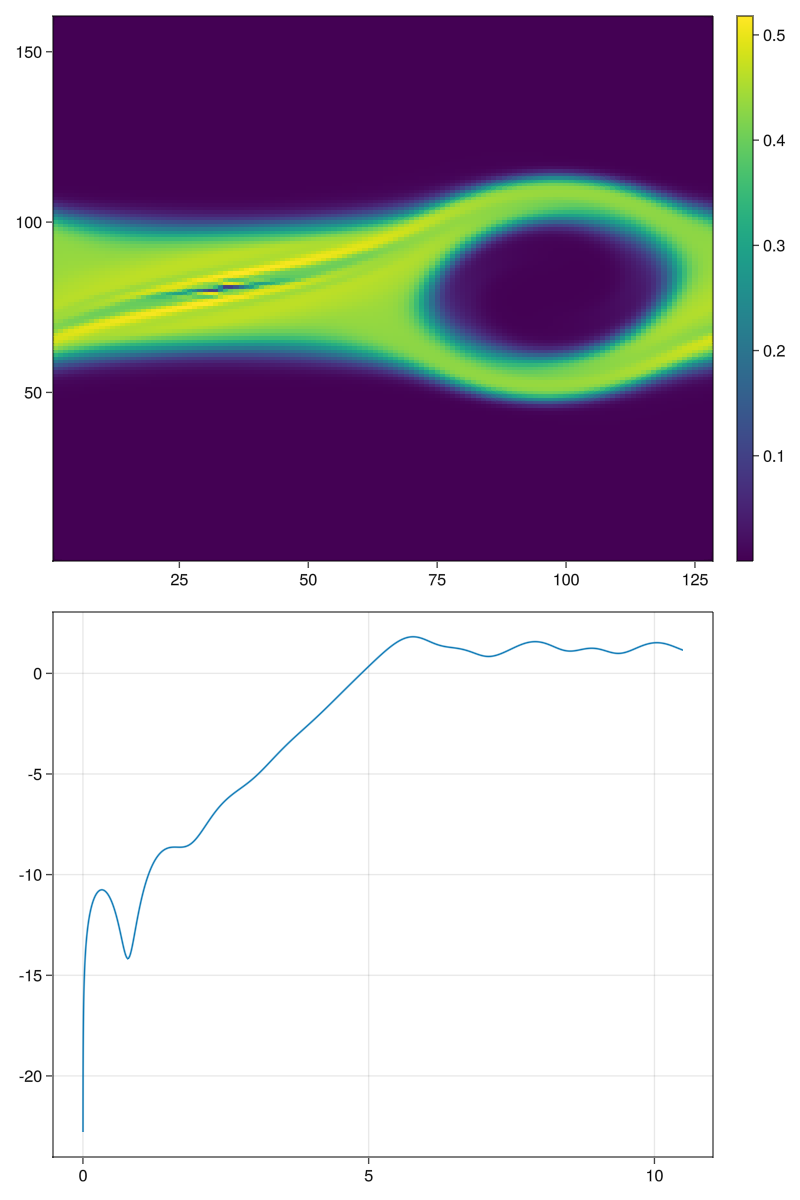

In [69]:
sim = full_tensor_initial_condition(domain, f0, η0, q=-sqrt(10));

T = 10.5
t = 0.0
Δt = 0.0005
E2 = Float64[]
@show nt = Int(round(T / Δt))
prog = Progress(nt)
for i in 1:nt
    step!(sim, Δt)
    push!(E2, norm(sim.E)^2 * domain.dx)
    next!(prog)
end

In [71]:
fig = Figure()
ax = Axis(fig[1, 1])
hm = heatmap!(ax, sim.f)
Colorbar(fig[1, 2], hm)
ax = Axis(fig[2, 1])
lines!(ax, Δt .* (2:nt), log.(E2[2:end]))
save("../plots/full_tensor.png", fig)

In [ ]:
svd(sim.S).S

In [ ]:
fig = Figure()
ax = Axis(fig[1, 1])
lines!(ax, domain.v, (sim.S * sim.V')[5, :])
fig

In [ ]:
fig = Figure()
ax = Axis(fig[1, 1])
lines!(ax, domain.x, (sim.X * sim.S)[:, 5])
fig